#SALES PREDICTION USING PYTHON

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Adding A File**

In [3]:
advertising = pd.DataFrame(pd.read_csv("/content/Advertising.csv"))
advertising.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
advertising.shape

(200, 5)

In [6]:
advertising.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


**Data Cleaning**

In [8]:
advertising.isnull().sum()*100/advertising.shape[0]

Unnamed: 0    0.0
TV            0.0
Radio         0.0
Newspaper     0.0
Sales         0.0
dtype: float64

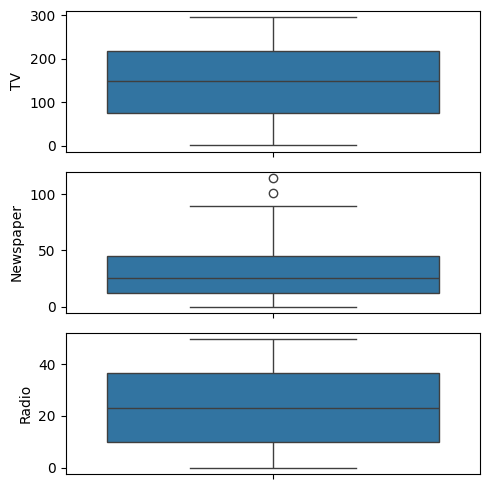

In [12]:
fig, axs= plt.subplots(3,figsize=(5,5))
plt1=sns.boxplot(advertising['TV'],ax=axs[0])
plt2=sns.boxplot(advertising['Newspaper'],ax=axs[1])
plt3=sns.boxplot(advertising['Radio'],ax=axs[2])
plt.tight_layout()

**Exploratory Data Analysis**

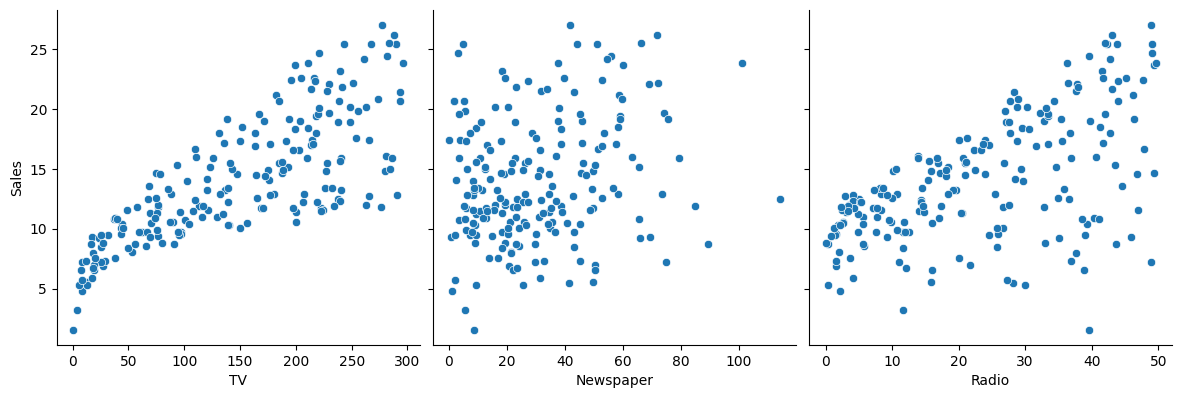

In [13]:
sns.pairplot(advertising,x_vars=['TV','Newspaper','Radio'],y_vars='Sales',height=4,aspect=1,kind='scatter')
plt.show()

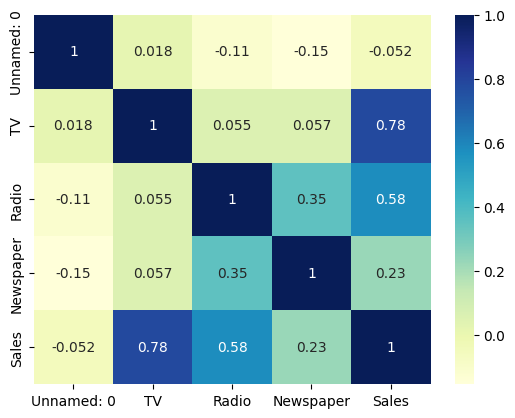

In [17]:

sns.heatmap(advertising.corr(), cmap="YlGnBu", annot=True)
plt.show()


***Performing Simple Linear Regression***

In [18]:
X=advertising['TV']
y=advertising['Sales']

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)


In [22]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [23]:
y_train.head()

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

***Bulding Linear Model***

In [25]:
import statsmodels.api as sm

In [28]:
X_train_sm = sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()

In [29]:
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [30]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     219.0
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           2.84e-30
Time:                        14:59:34   Log-Likelihood:                -370.62
No. Observations:                 140   AIC:                             745.2
Df Residuals:                     138   BIC:                             751.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9897      0.548     12.762      0.0

***Looking at some key statics from the summary***

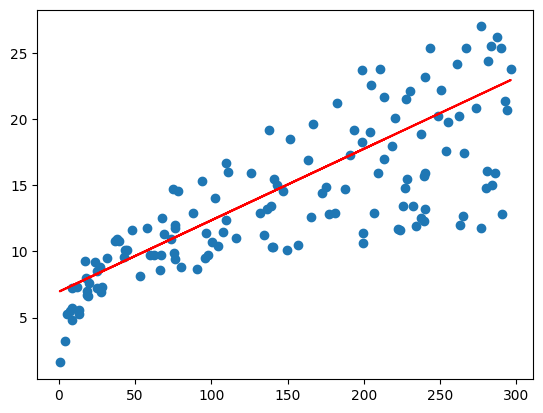

In [31]:
plt.scatter(X_train ,y_train)
plt.plot(X_train,6.948+0.054*X_train,'r')
plt.show()

***Model Evavluation***

In [33]:
y_train_pred = lr.predict(X_train_sm)
res=(y_train-y_train_pred)

<Figure size 640x480 with 0 Axes>

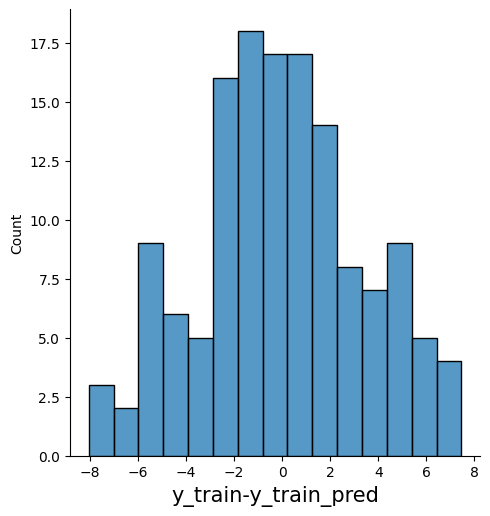

In [35]:
fig=plt.figure()
sns.displot(res,bins=15)
fig.suptitle('Error Terms',fontsize=15)
plt.xlabel('y_train-y_train_pred',fontsize=15)
plt.show()

***Looking for pattern residuals***

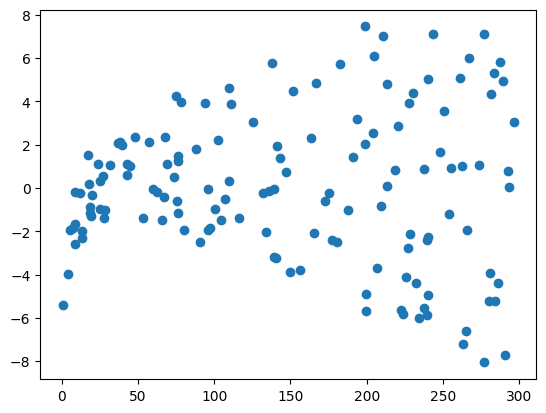

In [36]:
plt.scatter(X_train,res)
plt.show()

***Prediction on the Test Set***

In [37]:
X_test_sm=sm.add_constant(X_test)
y_pred=lr.predict(X_test_sm)

In [38]:
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [39]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
np.sqrt(mean_squared_error(y_test,y_pred))

2.8241456288327003

In [43]:
r_squared =r2_score(y_test,y_pred)
r_squared

0.5942987267783303

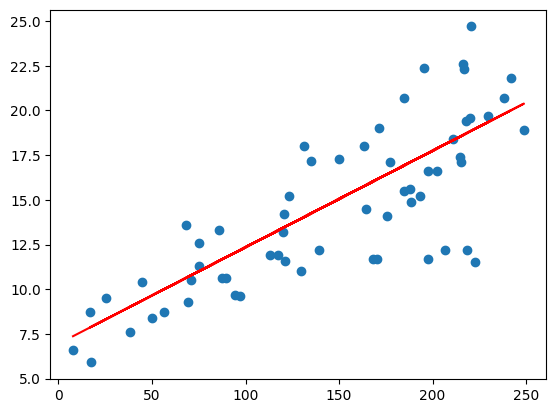

In [44]:
plt.scatter(X_test,y_test)
plt.plot(X_test,6.948+0.054*X_test,'r')
plt.show()

**Conclution**

*  Accurate Sales Forecasts

*  Optimized Marketing Strategies

*   Inventory Management Efficiency

*   Data-Driven Decision Making

*  Customer Segmentation Insights

*  Continuous Improvement and Adaptation






